In [1]:
import pandas as pd
import numpy as np
import talib as ta
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from scipy.signal import argrelextrema, find_peaks_cwt
import json
from bs4 import BeautifulSoup
import requests 
import urllib.request
import datetime
from datetime import timedelta, datetime
import time
from scipy import signal
diretorio= os.getcwd()
diretorio

'/Users/igoracmorais/igor/Wise&Trust/CPM_trading2/assets-management/Trading/Rotines/Python'

In [10]:
data=pd.read_csv(diretorio+"/btc.csv",sep=";",index_col="datetime")

In [11]:
def william(data,time=[]):
    for w in time:
        data["will_"+str(w)]=ta.WILLR(data.high, data.low, data.close, timeperiod=w)
        # sinal over
        data["will_"+str(w)+"_"+"s"]=0
        data.loc[(data["will_"+str(w)+"_"+"s"] > -50),"will_"+str(w)+"_"+"s"]=1
        data.loc[(data["will_"+str(w)+"_"+"s"] <= -50),"will_"+str(w)+"_"+"s"]=-1
        # sinal turning point
        data=turning_point(data,coluna=["will_"+str(w)])
    return data

In [22]:
# Candlestick graph
def candle_will(data,n=200,nome_coluna_datas="datetime",sinal1="will_21",sinal2="tp_will_21"):
    ohlc=data.reset_index()[-n:]
    ohlc[nome_coluna_datas]=pd.to_datetime(ohlc[nome_coluna_datas])
    ohlc[nome_coluna_datas]=ohlc[nome_coluna_datas].apply(mdates.date2num)
    #
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(6,8)) 
    ax1 = plt.subplot2grid((6,1), (0, 0),rowspan=3)
    ax2 = plt.subplot2grid((6,1), (3, 0),rowspan=2)
    ax1.axes.get_xaxis().set_visible(False)
    ax2.axes.get_xaxis().set_visible(False)
    candlestick_ohlc(ax1, ohlc.values, width=.6, colorup='green', colordown='red')
    # sinal1
    pos_signal = ohlc[sinal1].copy()
    neg_signal = ohlc[sinal1].copy()
    pos_signal[pos_signal <= -50] = np.nan
    neg_signal[neg_signal >= -50] = np.nan
    ax2.plot(ohlc[nome_coluna_datas], pos_signal, color = 'green', lw=1,linestyle=":")
    ax2.plot(ohlc[nome_coluna_datas], neg_signal, color = 'red', lw=1,linestyle=":")
    plt.xticks(fontsize=8)
    return plt.show()

In [13]:
def turning_point(data,coluna=[],ordem=3):
    for coluna in coluna:
        data[coluna+'_min'] = data.iloc[argrelextrema(data[coluna].values, 
                                                  np.less_equal, order=ordem)[0]][coluna]
        data[coluna+'_max'] = data.iloc[argrelextrema(data[coluna].values, 
                                                  np.greater_equal, order=ordem)[0]][coluna]
        data[coluna+'_min'].fillna(0,inplace=True)
        data[coluna+'_max'].fillna(0,inplace=True)
        data["tp_"+coluna]=0
        data.loc[data[coluna+'_min']>0,"tp_"+coluna]=1
        data.loc[data[coluna+'_max']>0,"tp_"+coluna]=-1
        data[[coluna+'_min',coluna+'_max']]=np.nan
        data.drop([coluna+'_min',coluna+'_max'],axis=1,inplace=True)
    return data

## Exemplo:

In [14]:
df=william(data,time=[7,14,21])
df.tail(3)

/Users/igoracmorais/anaconda3/lib/python3.6/site-packages/scipy/signal/_peak_finding.py:73: RuntimeWarning: invalid value encountered in less_equal
  results &= comparator(main, plus)
/Users/igoracmorais/anaconda3/lib/python3.6/site-packages/scipy/signal/_peak_finding.py:74: RuntimeWarning: invalid value encountered in less_equal
  results &= comparator(main, minus)
/Users/igoracmorais/anaconda3/lib/python3.6/site-packages/scipy/signal/_peak_finding.py:73: RuntimeWarning: invalid value encountered in greater_equal
  results &= comparator(main, plus)
/Users/igoracmorais/anaconda3/lib/python3.6/site-packages/scipy/signal/_peak_finding.py:74: RuntimeWarning: invalid value encountered in greater_equal
  results &= comparator(main, minus)


,open,high,low,close,volume,will_7,will_7_s,tp_will_7,will_14,will_14_s,tp_will_14,will_21,will_21_s,tp_will_21
datetime,,,,,,,,,,,,,,
2018-10-21,6490.60,6557.39,6474.47,6509.87,1.052839e+08,-73.223845,1,0,-68.207135,1,0,-68.207135,1,0
2018-10-22,6509.87,6531.23,6460.38,6483.23,2.027669e+08,-73.356401,1,0,-70.713533,1,0,-70.713533,1,0
2018-10-23,6484.32,6490.71,6450.55,6450.55,1.040892e+08,-77.937938,1,0,-73.788198,1,0,-73.788198,1,0


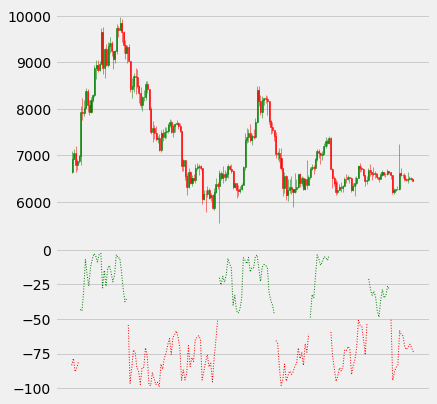

In [23]:
candle_will(df)